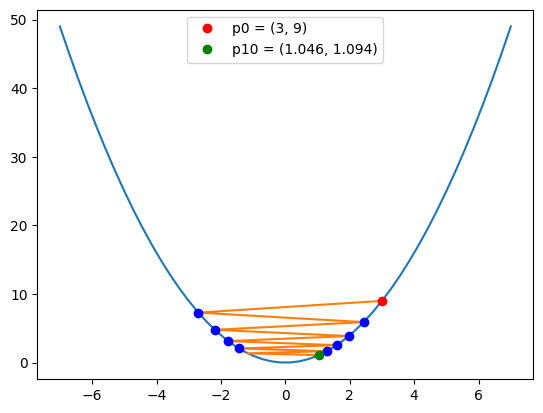

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
import decimal

def plot_grad_descent_2D(f, g, inputs, step_size, iterations, init_guess):
  plt.plot(inputs, f(inputs))
  last_guess = init_guess
  guesses = [last_guess]
  for i in range(iterations):
    g_x = g(last_guess)
    new_x = last_guess[0] - (step_size * g_x)
    last_guess = [new_x, f(new_x)]
    guesses.append(last_guess)
  plt.plot([guess[0] for guess in guesses], [guess[1] for guess in guesses])
  plt.plot(init_guess[0], init_guess[1], 'ro', label='p0 = ({}, {})'.format(str(init_guess[0])[:5], str(init_guess[1])[:5]))
  for point in guesses[1:-2]:
    plt.plot(point[0], point[1], 'bo')
  plt.plot(guesses[-1][0], guesses[-1][1], 'go', label='p{} = ({}, {})'.format(iterations, str(last_guess[0])[:5], str(last_guess[1])[:5]))
  plt.legend()
  plt.show()

#Edit stuff below to change plot

#the function and gradient defs are kind of lazy but I don't want to think about figuring out how to do it better
#function definition (this one squares x)
def x_squared(inputs):
  return inputs**2

#gradient definition for a function
def g_x_squared(point):
  return 2*point[0]

def sin_x_x_squared(inputs):
  return np.sin(inputs)*inputs**2

def f2(inputs):
  return math.sin(decimal.Decimal(inputs))*(decimal.Decimal(inputs))**2

def g_sin_x_x_squared(point):
  return math.cos(point[0])*(point[0]**2) + 2*point[0]*math.sin(point[0])

#change these things to make different plots

#range of x
x = np.linspace(-7,7)

#function and its gradient
function = x_squared
gradient = g_x_squared

#make a first guess
start_x = 3
init_guess = [start_x, function(start_x)]

#grad descent variables
step_size = 0.95
iterations = 10

#does the work
plot_grad_descent_2D(function, gradient, x, step_size, iterations, init_guess)

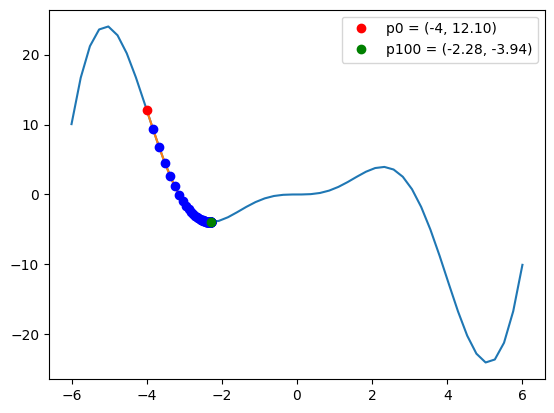

In [ ]:
plot_grad_descent_2D(sin_x_x_squared, g_sin_x_x_squared, np.linspace(-6,6), 0.01, 100, [-4, sin_x_x_squared(-4)])

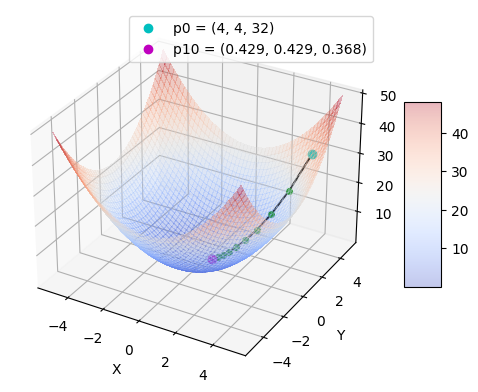

In [ ]:
from matplotlib import cm

def plot_grad_descent_3D(f, g, inputs, step_size, iterations, init_guess):
  X, Y = np.meshgrid(inputs[0], inputs[1])
  Z = f(X, Y)
  fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
  surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.3)
  fig.colorbar(surf, shrink=0.5, aspect=5)
  last_guess = init_guess
  guesses = [init_guess]
  for i in range(iterations):
    g_x, g_y = g(last_guess)
    new_x, new_y = last_guess[0] - (step_size * g_x), last_guess[1] - (step_size * g_y)
    last_guess = [new_x, new_y, f(new_x, new_y)]
    guesses.append(last_guess)
  np_guesses = np.array(guesses)
  ax.set(xlabel='X', ylabel='Y')
  ax.plot(np_guesses[:,0], np_guesses[:,1], np_guesses[:,2], color='k')
  plt.plot(init_guess[0], init_guess[1], init_guess[2], 'co',
           label='p0 = ({}, {}, {})'.format(str(init_guess[0])[:5], str(init_guess[1])[:5], str(init_guess[2])[:5]))
  for point in guesses[1:-2]:
    plt.plot(point[0], point[1], point[2], 'go', markersize=4)
  plt.plot(last_guess[0], last_guess[1], last_guess[2], 'mo',
           label='p{} = ({}, {}, {})'.format(iterations, str(last_guess[0])[:5], str(last_guess[1])[:5], str(last_guess[2])[:5]))
  plt.legend()
  plt.show()


def x_squared_plus_y_squared(x, y):
  return x**2 + y**2

def g_x_squared_plus_y_squared(point):
  return 2*point[0], 2*point[1]

x = np.linspace(-5,5)
y = np.linspace(-5,5)
inputs = [x, y]

function = x_squared_plus_y_squared
gradient = g_x_squared_plus_y_squared

start_x = 4
start_y = 4
init_guess = [start_x, start_y, function(start_x, start_y)]

step_size = 0.1
iterations = 10

plot_grad_descent_3D(function, gradient, inputs, step_size, iterations, init_guess)